In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

import os
os.chdir("/Users/keith/astr/research_astr/summer-roman-project/4) FOV0_sims/fits")

In [2]:
root = "GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits"
wangetal_slitless_bkg = fits.open("wangetal_GRS_FOV0_roll0_dx0_dy0_SCA1_slitless_final.fits")[1].data
flat_spectra = fits.open("flat_spectra_{0}".format(root))[0].data
unique_spectra = fits.open("unique_spectra_{0}".format(root))[1].data

In [3]:
# Background subtraction
from photutils.background import Background2D, MedianBackground
bkg_estimator = MedianBackground()
bkg = Background2D(wangetal_slitless_bkg, (511,511), filter_size=(3,3), bkg_estimator=bkg_estimator)
wangetal_slitless = wangetal_slitless_bkg - bkg.background

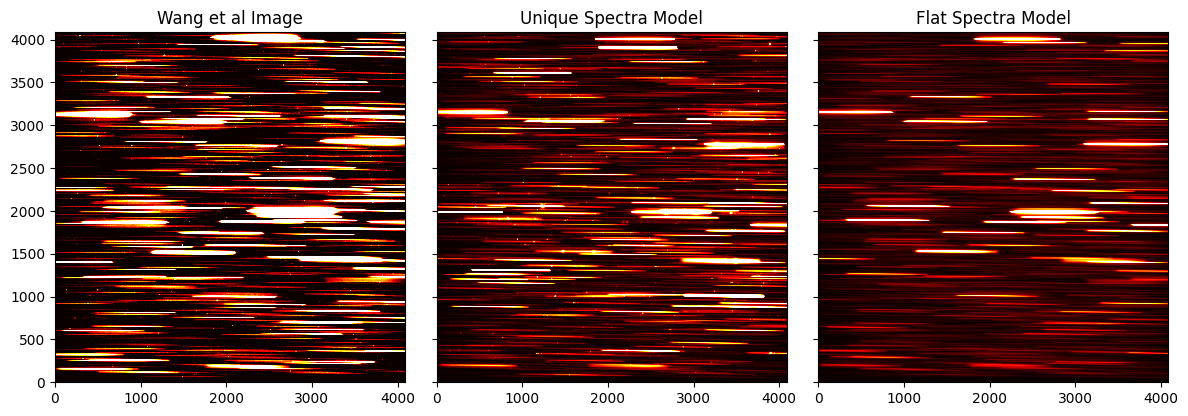

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))

ax1.imshow(wangetal_slitless, origin='lower', cmap='hot', vmin=0, vmax=wangetal_slitless.max()/1000)
ax1.set_title("Wang et al Image")

ax2.imshow(unique_spectra, origin='lower', cmap='hot', vmin=0, vmax=unique_spectra.max()/1000)
ax2.set_title("Unique Spectra Model")

ax3.imshow(flat_spectra, origin='lower', cmap='hot', vmin=0, vmax=flat_spectra.max()/100)
ax3.set_title("Flat Spectra Model")

for ax in fig.axes[1:]:
    ax.set_yticklabels([])
    
fig.tight_layout()